# **T&T LAB ASSIGNMENT 9**  
**Name: Shidhu Bhadra  
Roll: 1905348  
Date: 02/03/2022**

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_main = pd.read_csv("income.csv")

In [3]:
df_main.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
df = df_main.copy()

In [5]:
df.isnull().mean().round(5).mul(100).sort_values(ascending=False)

age              0.0
JobType          0.0
EdType           0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
gender           0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
nativecountry    0.0
SalStat          0.0
dtype: float64

In [6]:
df.drop(columns=['relationship','capitalgain', 'capitalloss'], inplace=True)

In [7]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,race,gender,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,White,Female,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,White,Male,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,White,Male,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,White,Male,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,White,Male,35,United-States,"less than or equal to 50,000"


In [8]:
cols = ['JobType', 'EdType', 'maritalstatus', 'occupation', 'race', 
        'gender', 'nativecountry', 'SalStat']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,race,gender,hoursperweek,nativecountry,SalStat
0,45,4,11,0,1,4,0,28,38,1
1,24,1,11,4,2,4,1,40,38,1
2,44,4,15,2,10,4,1,40,38,0
3,27,4,6,4,3,4,1,40,25,1
4,20,4,15,4,12,4,1,35,38,1


In [10]:
df.SalStat.value_counts()

1    24283
0     7695
Name: SalStat, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['SalStat']), df['SalStat'], train_size = 0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25582, 9), (25582,), (6396, 9), (6396,))

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

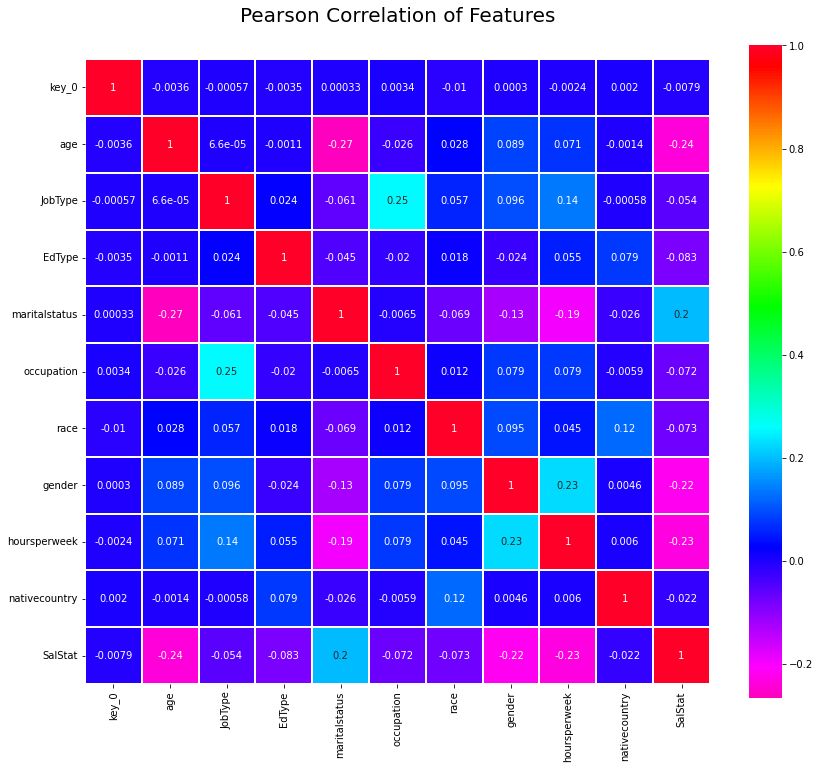

In [25]:
colormap = plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
         square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)


In [13]:
algorithm = []
accuracy = []
recall = []
precision = []
f1Score = []

# **Q1) Using following machine learning algorithm**
1. Logistic Regression
2. k-NN
3. Decision Tree
4. Random Forest
5. Naive Bayes

## **1. Logistic Regression**

In [14]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

print("Logistic Regression")
accLogReg = accuracy_score(y_test, y_pred) * 100
recLogReg = recall_score(y_test, y_pred) * 100
preLogReg = precision_score(y_test, y_pred) * 100
f1sLogReg = f1_score(y_test, y_pred) * 100
print('Accuracy:', accLogReg)
print('Recall:', recLogReg)
print('Precision:', preLogReg)
print('F score:', f1sLogReg)

algorithm.append("Logistic Regression")
accuracy.append(accLogReg)
recall.append(recLogReg)
precision.append(preLogReg)
f1Score.append(f1sLogReg)


Logistic Regression
Accuracy: 75.25015634771732
Recall: 93.96498455200823
Precision: 77.95625427204375
F score: 85.21527972354534


## **2. k-NN**

In [15]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

print("K Nearest Neighbour")
accKNN = accuracy_score(y_test, y_pred) * 100
recKNN = recall_score(y_test, y_pred) * 100
preKNN = precision_score(y_test, y_pred) * 100
f1sKNN = f1_score(y_test, y_pred) * 100
print('Accuracy:', accKNN)
print('Recall:', recKNN)
print('Precision:', preKNN)
print('F score:', f1sKNN)

algorithm.append("K Nearest Neighbour")
accuracy.append(accKNN)
recall.append(recKNN)
precision.append(preKNN)
f1Score.append(f1sKNN)

K Nearest Neighbour
Accuracy: 78.78361475922452
Recall: 87.0648815653965
Precision: 85.29055690072639
F score: 86.16858628070533


## **3. Decision Tree**

In [16]:
DecTreeReg = DecisionTreeClassifier()
DecTreeReg.fit(x_train, y_train)
y_pred = DecTreeReg.predict(x_test)
print("Decision Tree")
accDecTreeReg = accuracy_score(y_test, y_pred) * 100
recDecTreeReg = recall_score(y_test, y_pred) * 100
preDecTreeReg = precision_score(y_test, y_pred) * 100
f1sDecTreeReg = f1_score(y_test, y_pred) * 100
print('Accuracy:', accDecTreeReg)
print('Recall:', recDecTreeReg)
print('Precision:', preDecTreeReg)
print('F score:', f1sDecTreeReg)

algorithm.append("Decision Tree")
accuracy.append(accDecTreeReg)
recall.append(recDecTreeReg)
precision.append(preDecTreeReg)
f1Score.append(f1sDecTreeReg)

Decision Tree
Accuracy: 78.15822388993121
Recall: 84.73738414006179
Precision: 86.24737945492662
F score: 85.48571428571427


## **4. Random Forest** 

In [17]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print("Random Forest")
accRF = accuracy_score(y_test, y_pred) * 100
recRF = recall_score(y_test, y_pred) * 100
preRF = precision_score(y_test, y_pred) * 100
f1sRF = f1_score(y_test, y_pred) * 100
print('Accuracy:', accRF)
print('Recall:', recRF)
print('Precision:', preRF)
print('F score:', f1sRF)

algorithm.append("Random Forest")
accuracy.append(accRF)
recall.append(recRF)
precision.append(preRF)
f1Score.append(f1sRF)

Random Forest
Accuracy: 81.95747342088805
Recall: 90.25746652935118
Precision: 86.5494765949042
F score: 88.36458963500706


## **5. Naive Bayes**

In [18]:
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
print("Naive Bayes")
accNB = accuracy_score(y_test, y_pred) * 100
recNB = recall_score(y_test, y_pred) * 100
preNB = precision_score(y_test, y_pred) * 100
f1sNB = f1_score(y_test, y_pred) * 100
print('Accuracy:', accNB)
print('Recall:', recNB)
print('Precision:', preNB)
print('F score:', f1sNB)

algorithm.append("Naive Bayes")
accuracy.append(accNB)
recall.append(recNB)
precision.append(preNB)
f1Score.append(f1sNB)

Naive Bayes
Accuracy: 77.56410256410257
Recall: 81.77136972193615
Precision: 87.83185840707965
F score: 84.69333333333331


# **Q2) Construct a table and compare all the algorithms’ result. Plot a bar for accuracy of each algorithm.**  
  
|   |   Accuracy   |    Recall    |   Precision   |   F1 Score   |
|---|---|---|---|---|
|   LR   |   |   |   |   |
|   kNN   |   |   |   |   |
|   DT   |   |   |   |   |
|   RF   |   |   |   |   |
|   NB   |   |   |   |   |
  
For the dataset ‘income.csv’: find the following performance metrices:  
1. Accuracy  
2. Precision  
3. F-score  
4. Recall/Sensitivity  

Confusion matrix  
Classification Report


In [19]:
algoTable = pd.DataFrame(list(zip(algorithm, accuracy, recall, precision, f1Score)), columns=["Algorithms", "Accuracy", "Recall", "Precision", "F1 Score"])
algoTable

,Algorithms,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,75.250156,93.964985,77.956254,85.215280
1,K Nearest Neighbour,78.783615,87.064882,85.290557,86.168586
2,Decision Tree,78.158224,84.737384,86.247379,85.485714
3,Random Forest,81.957473,90.257467,86.549477,88.364590
4,Naive Bayes,77.564103,81.771370,87.831858,84.693333


## **Confusion Matrix for each Model**

In [20]:
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred), '\n\n')

print("K Nearest Neighbour")
print(confusion_matrix(y_test, y_pred), '\n\n')

print("Decision Tree")
print(confusion_matrix(y_test, y_pred), '\n\n')

print("Naive Bayes")
print(confusion_matrix(y_test, y_pred), '\n\n')

print("Random Forest")
print(confusion_matrix(y_test, y_pred), '\n\n')

Logistic Regression
[[ 991  550]
 [ 885 3970]] 


K Nearest Neighbour
[[ 991  550]
 [ 885 3970]] 


Decision Tree
[[ 991  550]
 [ 885 3970]] 


Naive Bayes
[[ 991  550]
 [ 885 3970]] 


Random Forest
[[ 991  550]
 [ 885 3970]] 




## **Barplot for accuracy of each algorithm**

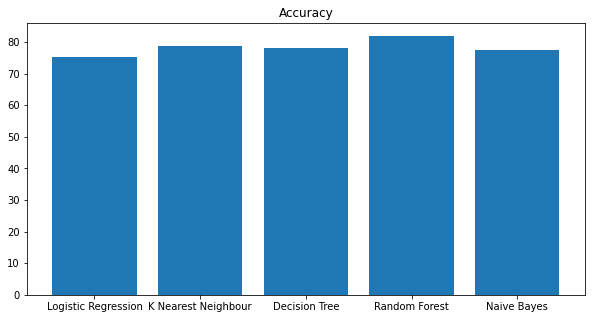

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(algorithm, accuracy)
plt.title("Accuracy")
plt.show()